In [9]:
import torch
import cv2
import numpy as np
from unet import UNet

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = UNet().to(device)
model.load_state_dict(torch.load("unet_liver_final.pth"))
model.eval()

image_path = r"C:\Users\S.SAI\OneDrive\Desktop\LiTS\train_images\train_images\volume-93_slice_467.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (256, 256))
image = image.astype(np.float32) / 255.0
image = np.expand_dims(image, axis=(0, 1))  # shape: [1, 1, 256, 256]
image_tensor = torch.tensor(image).to(device)

with torch.no_grad():
    pred = model(image_tensor)
    pred = (pred > 0.3).float().cpu().numpy().squeeze()

image_vis = (image.squeeze() * 255).astype(np.uint8)
pred_vis = (pred * 255).astype(np.uint8)

combined = np.hstack([
    cv2.cvtColor(image_vis, cv2.COLOR_GRAY2BGR),
    cv2.cvtColor(pred_vis, cv2.COLOR_GRAY2BGR)
])
cv2.imwrite("test_prediction_result-4.png", combined)
print("Saved: test_prediction_result-4.png")

Saved: test_prediction_result-4.png


Selected tumor slice: volume-93_slice_467.jpg


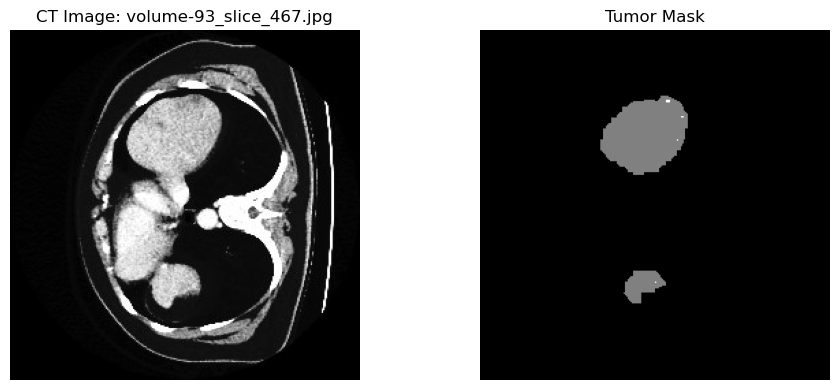

In [7]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

tumor_dir = r"C:/Users/S.SAI/OneDrive/Desktop/LiTS/train_masks/train_masks"
image_dir = r"C:/Users/S.SAI/OneDrive/Desktop/LiTS/train_images/train_images"

# Collect all tumor-containing slices
tumor_filenames = []
for fname in os.listdir(tumor_dir):
    mask_path = os.path.join(tumor_dir, fname)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    if mask is not None and np.any(mask):
        tumor_filenames.append(fname)

# Choose one at random
selected = random.choice(tumor_filenames)
print("Selected tumor slice:", selected)

# Load image and mask
image_path = os.path.join(image_dir, selected)
mask_path  = os.path.join(tumor_dir, selected)

image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
mask  = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

# Show
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title(f"CT Image: {selected}")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title("Tumor Mask")
plt.axis('off')

plt.tight_layout()
plt.show()
